# Pizza Sales Analysis

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let start by loading the datasets
order_details= pd.read_csv(r"C:\Users\user\Desktop\pizza_sales\order_details.csv")
orders= pd.read_csv(r"C:\Users\user\Desktop\pizza_sales\orders.csv")
pizza_types= pd.read_csv(r"C:\Users\user\Desktop\pizza_sales\pizza_types.csv", encoding='latin1')
pizzas= pd.read_csv(r"C:\Users\user\Desktop\pizza_sales\pizzas.csv")

In [3]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [5]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [6]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [7]:
#Merging the individual files to become one 
pizza_sales_df = pd.merge(order_details, pizzas, on='pizza_id', how='left')
pizza_sales_df = pd.merge(pizza_sales_df, pizza_types, on='pizza_type_id', how='left')
pizza_sales_df = pd.merge(pizza_sales_df, orders, on='order_id', how='left')

In [8]:
pizza_sales_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


In [9]:
#Adding the Day of the week column to the other columns
pizza_sales_df['date'] = pd.to_datetime(pizza_sales_df['date'])

pizza_sales_df['day_of_week'] = pizza_sales_df['date'].dt.day_name()

pizza_sales_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,day_of_week
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,Thursday
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,Thursday
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,Thursday
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,Thursday
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,Thursday


In [10]:
#Since we are going to solve questions regarding hour, so we need the hour column
pizza_sales_df['hour'] = pd.to_datetime(pizza_sales_df['time'], format = '%H:%M:%S').dt.hour

pizza_sales_df[['time', 'hour']].head()

,time,hour
0,11:38:36,11
1,11:57:40,11
2,11:57:40,11
3,11:57:40,11
4,11:57:40,11


In [11]:
pizza_sales_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,day_of_week,hour
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,Thursday,11
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,Thursday,11
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,Thursday,11
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,Thursday,11
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,Thursday,11


#### Answering The 10 Questions

### 1. What is the total revenue or sales?


In [12]:
#To calculate the total price for each row we have (quality*price)
pizza_sales_df['revenue'] = pizza_sales_df['quantity'] * pizza_sales_df['price']

pizza_sales_df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,day_of_week,hour,revenue
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,Thursday,11,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,Thursday,11,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,Thursday,11,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,Thursday,11,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,Thursday,11,16.00


In [13]:
#To get the total revenue/sales we have to sum the calculated total_price column.

total_revenue = pizza_sales_df['revenue'].sum()

print(f"The total revenue is: ${total_revenue:,.2f}")

The total revenue is: $817,860.05


### 2. Find the total quantity sold.

In [14]:
#We sum the quantity column.

total_quantity = pizza_sales_df['quantity'].sum()

print(f"The total quantity sold is: {total_quantity}")

The total quantity sold is: 49574


### 3. Find the total order 

In [15]:
#We have to count the unique order_id entries

total_orders = pizza_sales_df['order_id'].count()

print(f"The total orders are: {total_orders}")

The total orders are: 48620


### 4. How many pizza types do they sell?

In [16]:
#We have to count the unique pizza_type_id entries.

pizza_types_count = pizza_sales_df['pizza_type_id'].nunique()

print(f"The number of pizza types are: {pizza_types_count}")

The number of pizza types are: 32


### 5. Find the average price of the pizza.

In [17]:
#This is the mean of the price column from the pizzas.

avg_price = (pizza_sales_df['price']* pizza_sales_df['quantity']).sum()/pizza_sales_df['quantity'].sum()

print(f"The average pizza price is: $ {avg_price:.2f}")

The average pizza price is: $ 16.50


### 6. What are the peak hours of sales?

In [18]:
#We have to group the data by the hour column to see when the most orders occur.

peak_hours = pizza_sales_df.groupby('hour')['order_id'].count().sort_values(ascending=False)

print("The peak hours of sales (Hour: Number of orders): ")

print(peak_hours.head())

The peak hours of sales (Hour: Number of orders): 
hour
12    6543
13    6203
18    5359
17    5143
19    4350
Name: order_id, dtype: int64


In [19]:
#Creating a visiualization representation for the peak hours

hourly_sales = peak_hours.sort_index()


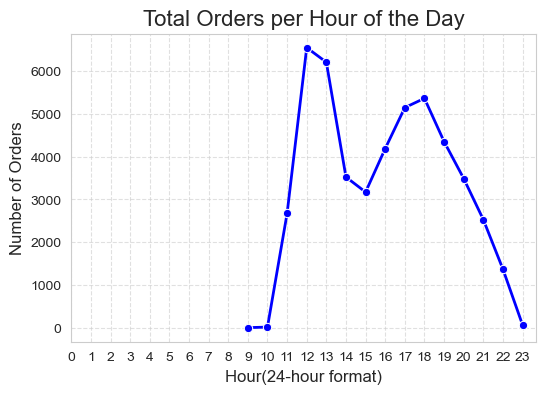

In [20]:
#To create the plot we:
plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', color='b', linewidth=2)
plt.title('Total Orders per Hour of the Day', fontsize=16)
plt.xlabel('Hour(24-hour format)', fontsize=12)
plt.ylabel('Number of Orders',fontsize=12)
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### 7. Total sales by day of the week & Best day of sales.

In [21]:
#We have to extract the day name from the data and then sum the revenue.

sales_by_day = pizza_sales_df.groupby('day_of_week')['revenue'].sum()

print("Sales of the week: ")

print(sales_by_day)

best_day = sales_by_day.idxmax()

print(f"\n \nThe best day for sales is: {best_day} ")

Sales of the week: 
day_of_week
Friday       136073.90
Monday       107329.55
Saturday     123182.40
Sunday        99203.50
Thursday     123528.50
Tuesday      114133.80
Wednesday    114408.40
Name: revenue, dtype: float64

 
The best day for sales is: Friday 


### 8. Find the top 5 bestselling pizzas.

In [22]:
#We have to group by pizza name and sum the quantities sold.

top_5_pizzas = pizza_sales_df.groupby('name')['quantity'].sum().sort_values(ascending=False).head()

print("The top 5 bestselling pizzas are: ")

print(top_5_pizzas)

The top 5 bestselling pizzas are: 
name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


### 9. Find the sales made in each month. Any trend noticeable?

In [23]:
#We have to group by month to observe any seasonal change

pizza_sales_df['month'] = pizza_sales_df['date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sales_by_month = pizza_sales_df.groupby('month')['revenue'].sum().reindex(month_order)

print("The monthly sales trend: ")

print(sales_by_month)

The monthly sales trend: 
month
January      69793.30
February     65159.60
March        70397.10
April        68736.80
May          71402.75
June         68230.20
July         72557.90
August       68278.25
September    64180.05
October      64027.60
November     70395.35
December     64701.15
Name: revenue, dtype: float64


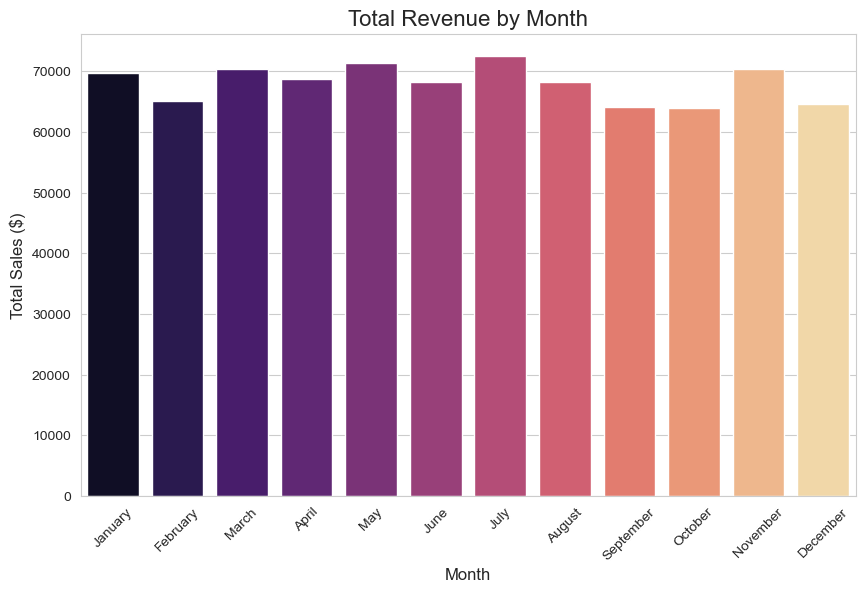

In [24]:
monthly_revenue=pizza_sales_df.groupby(pizza_sales_df['date'].dt.month_name())['revenue'].sum()
month_order_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered_data=monthly_revenue.reindex(month_order_list)
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plot=sns.barplot(x=ordered_data.index, y=ordered_data.values, palette='magma', hue=ordered_data.index, legend=False)
plt.title('Total Revenue by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 10. Are there pizza types that are not doing well?

In [25]:
#We have to look for pizzas with the lowest total quantity sold.

least_pizza_sold = pizza_sales_df.groupby('name')['quantity'].sum().sort_values(ascending=True).head(5)

print("The bottom 5 pizzas with the lowest sales:")

print(least_pizza_sold)

The bottom 5 pizzas with the lowest sales:
name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64



#### Task Summary
This analysis provides a comprehensive look at the sales performance of a pizza restuarant. By transforming raw transaction data into visual trends, we can draw the following conclusions:

* Peak Orders: Sales peak significantly during the lunch hour (12:00PM - 1:00PM) and dinner rush (5:00PM - 7:00PM).

* Weekly Patterns: Friday emerged as the best revenue-generating day of the week.

* Seasonal Trends: The monthly revenue analysis showed that there is a consistent performance throughtout the year, with notable peaks in months like    July and November.

* Revenue Management: Creating a revenue column help us to track the financial performance.

##### Technical Implementation:
* Data Wrangling: Used pandas for grouping, reindexing categorical time data for accuracy.
  
* Visualization: Implemented Matplotlib and Seaborn to create intuitive charts.
  
* Effciency: Streamlined data types and handled potential errors to ensure a reproducible analysis.